In [1]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] ="0"
# os.environ["WANDB_DISABLED"] = "true"
# os.environ["TOKENIZERS_PARALLELISM"] = "false"

# 경고 메시지 무시하기
import warnings
warnings.filterwarnings("ignore")



In [2]:
import pandas as pd
train=pd.read_csv('./dataset/train.csv')
test=pd.read_csv('./dataset/test.csv')


In [3]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25000 non-null  int64 
 1   reviews  25000 non-null  object
 2   target   25000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 586.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25000 non-null  int64 
 1   reviews  25000 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [4]:
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)

Train Columns:  Index(['id', 'reviews', 'target'], dtype='object')
Test Columns:  Index(['id', 'reviews'], dtype='object')


In [5]:
print(f'train.shape:{train.shape}')
print(f'test.shape:{test.shape}')
print(f'train label 개수: {train.target.nunique()}')

train.shape:(25000, 3)
test.shape:(25000, 2)
train label 개수: 4


In [6]:
print('Train Label: ', train['target'].value_counts(), sep='\n', end='\n\n')

Train Label: 
5    10000
2     8000
1     4500
4     2500
Name: target, dtype: int64



In [7]:
print(train.isnull().values.any()) # Null 값이 존재하는지 확인
print(test.isnull().values.any()) # Null 값이 존재하는지 확인

False
False


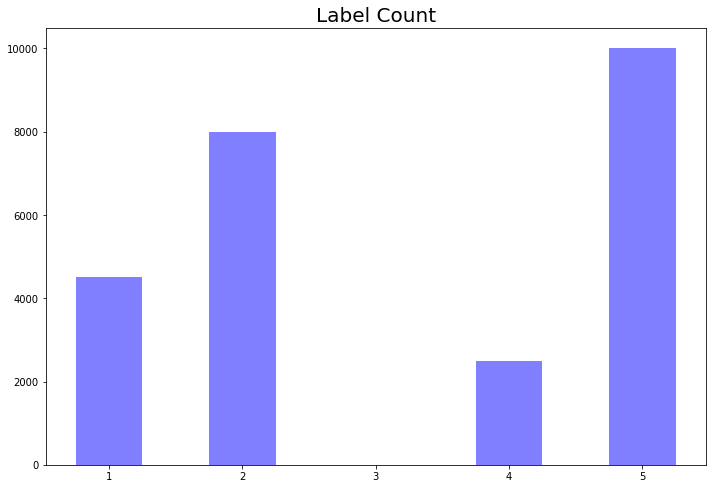

In [8]:
import matplotlib.pyplot as plt
feature = train['target']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [9]:
print("train review 최대 길이:", train['reviews'].map(len).max())
print("test review 최대 길이:", test['reviews'].map(len).max())

train review 최대 길이: 140
test review 최대 길이: 140


In [10]:
import numpy as np

max_len = np.max(train['reviews'].str.len())
min_len = np.min(train['reviews'].str.len())
mean_len = np.mean(train['reviews'].str.len())

print('Max reviews Length: ', max_len)
print('Min reviews Length: ', min_len)
print('Mean reviews Lenght: ', mean_len, '\n')

Max reviews Length:  140
Min reviews Length:  5
Mean reviews Lenght:  39.98808 



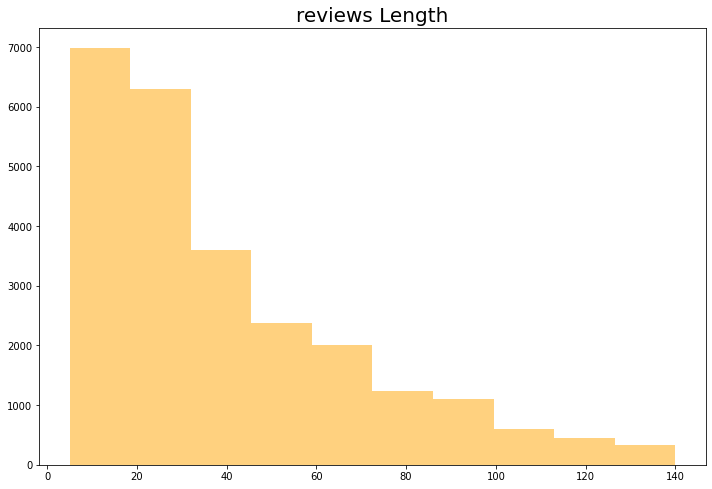

In [11]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('reviews Length', fontsize=20)

plt.hist(train['reviews'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

In [12]:
train['reviews'] = train['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['reviews'] = test['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

,id,reviews,target
0,0,조아요 처음구입 싸게햇어요,2
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플...,2
4,4,튼튼하고 손목을 잘 받쳐주네요,5


In [13]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()
label_encoder.fit(train['target'])
num_labels = len(label_encoder.classes_)

train['encoded_label'] = np.asarray(label_encoder.transform(train['target']), dtype=np.int32)
train.head()

,id,reviews,target,encoded_label
0,0,조아요 처음구입 싸게햇어요,2,1
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,0
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,1
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다 샘플...,2,1
4,4,튼튼하고 손목을 잘 받쳐주네요,5,3


In [14]:
from sklearn.model_selection import train_test_split

train_reviews, val_reviews, train_target, val_target  = train_test_split(train['reviews'], train['encoded_label'], test_size=0.25, shuffle=True, stratify=train['encoded_label'], random_state=42)   

In [15]:
print(">>> train_reviews [{}] <<<\n".format(len(train_reviews)))
print(">>> train_target [{}] <<<".format(len(train_target)))

print(">>> val_reviews [{}] <<<\n".format(len(val_reviews)))
print(">>> val_target [{}] <<<\n".format(len(val_target)))

>>> train_reviews [20000] <<<

>>> train_target [20000] <<<
>>> val_reviews [5000] <<<

>>> val_target [5000] <<<



In [16]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


class PytorchDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

In [17]:
# !pip install transformers==4.6.0

In [18]:
from transformers import BertForSequenceClassification, BertTokenizer
from transformers import Trainer, TrainingArguments
from datetime import datetime
# import tensorflow as tf
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

MODEL_NAME = 'klue/bert-base'

model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=4)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

print(">> Step 2 : text encoding...")
train_encodings = tokenizer(train_reviews.values.tolist(), truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(val_reviews.values.tolist(), truncation=True, padding=True, max_length=64)


print(">> Step 3 : Training...") # tokenized data => torch Dataset => train
train_target_list = train_target.values.tolist() #np.argmax(y_train.values.tolist(), axis=1)
val_target_list = val_target.values.tolist() #np.argmax(y_test.values.tolist(), axis=1)

train_dataset = PytorchDataset(train_encodings, train_target_list)
val_dataset = PytorchDataset(test_encodings, val_target_list)

training_args = TrainingArguments(
    output_dir='./tmp', 
    overwrite_output_dir = True,
    num_train_epochs=8,            
    per_device_train_batch_size=16,  
    per_device_eval_batch_size=32,
    warmup_steps=1000,                
    weight_decay=0.01,          
    save_total_limit=1,     
    logging_dir='./logs',            
    load_best_model_at_end=False,            
    evaluation_strategy="epoch"
) 

trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset = val_dataset
)

trainer.train()   



Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

>> Step 2 : text encoding...
>> Step 3 : Training...


Epoch,Training Loss,Validation Loss
1,0.797700,0.772054
2,0.706800,0.758198
3,0.598900,0.834811
4,0.418800,0.992273
5,0.259500,1.362571
6,0.171200,1.814881
7,0.090200,2.220988
8,0.064000,2.479041


TrainOutput(global_step=10000, training_loss=0.3919500524520874, metrics={'train_runtime': 2944.6923, 'train_samples_per_second': 3.396, 'total_flos': 0, 'epoch': 8.0})

In [19]:
print(train_encodings['input_ids'][1])
print(tokenizer.decode(train_encodings['input_ids'][1]))

[2, 4051, 2372, 2088, 2075, 2209, 1504, 2053, 2273, 12547, 2052, 7645, 15351, 2203, 2182, 24406, 2052, 15807, 2470, 2180, 2246, 2227, 2182, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'[CLS] 하루입고나니 이음새부분이 구멍이나네요 바느질이 허술한거같아요 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [20]:
# import re 

# id2labels = model.config.id2label
# model.config.id2label = {id : label_encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0]  for id, label in id2labels.items()}

In [36]:
MODEL_NAME = 'fine-tuned-klue-bert-base2'
MODEL_SAVE_PATH = os.path.join("_model", MODEL_NAME)
# save tokenizer, model
model.save_pretrained(MODEL_SAVE_PATH)
tokenizer.save_pretrained(MODEL_SAVE_PATH)

('_model/fine-tuned-klue-bert-base2/tokenizer_config.json',
 '_model/fine-tuned-klue-bert-base2/special_tokens_map.json',
 '_model/fine-tuned-klue-bert-base2/vocab.txt',
 '_model/fine-tuned-klue-bert-base2/added_tokens.json')

In [37]:
from transformers import TextClassificationPipeline
# Load Fine-tuning model
loaded_tokenizer = BertTokenizer.from_pretrained(MODEL_SAVE_PATH)
loaded_model = BertForSequenceClassification.from_pretrained(MODEL_SAVE_PATH)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='pt',
    return_all_scores=True
)

In [23]:
predicted_label_list = []
predicted_score_list = []

for text in test['reviews']:
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = sorted(preds_list, key=lambda x: x['score'], reverse=True)
    predicted_label_list.append(sorted_preds_list[0]) # label
    predicted_score_list.append(sorted_preds_list[1]) # score
test['pred'] = predicted_label_list
test['score'] = predicted_score_list

test.head()

,id,reviews,pred,score
0,0,채소가 약간 시들어 있어요,"{'label': 'LABEL_1', 'score': 0.99651038646698}","{'label': 'LABEL_2', 'score': 0.00283441389910..."
1,1,발톱 두껍고 단단한 분들 써도 소용없어요 이 테이프 물렁거리고 힘이없어서 들어 올리...,"{'label': 'LABEL_0', 'score': 0.9998512864112854}","{'label': 'LABEL_1', 'score': 7.58576861699111..."
2,2,부들부들 좋네요 입어보고 시원하면 또 살게요,"{'label': 'LABEL_3', 'score': 0.9977527856826782}","{'label': 'LABEL_1', 'score': 0.00115100760012..."
3,3,이런 1 8 골드 주라니깐 파란개 오네 회사전화걸어도 받지도 않고 머하자는거임,"{'label': 'LABEL_0', 'score': 0.9998502135276794}","{'label': 'LABEL_1', 'score': 6.20732316747307..."
4,4,검수도 없이 보내구 불량 배송비 5000원 청구하네요 완전별로 별하나도 아까워요,"{'label': 'LABEL_0', 'score': 0.9998546838760376}","{'label': 'LABEL_1', 'score': 7.23776247468777..."


In [24]:
print("THE END")

THE END


In [25]:
test['pred']

0          {'label': 'LABEL_1', 'score': 0.99651038646698}
1        {'label': 'LABEL_0', 'score': 0.9998512864112854}
2        {'label': 'LABEL_3', 'score': 0.9977527856826782}
3        {'label': 'LABEL_0', 'score': 0.9998502135276794}
4        {'label': 'LABEL_0', 'score': 0.9998546838760376}
                               ...                        
24995    {'label': 'LABEL_3', 'score': 0.9971955418586731}
24996    {'label': 'LABEL_3', 'score': 0.9997197389602661}
24997     {'label': 'LABEL_1', 'score': 0.999771237373352}
24998    {'label': 'LABEL_3', 'score': 0.9996045231819153}
24999     {'label': 'LABEL_1', 'score': 0.999701976776123}
Name: pred, Length: 25000, dtype: object

In [26]:

# import re 

# submission = {id : label_encoder.inverse_transform([int(re.sub('LABEL_', '', label))])[0]  for id, label in test['pred']}

In [27]:
test.to_csv('./result_klueBert3.csv', sep=',')

In [28]:
id2label = {"LABEL_0": 1, "LABEL_1": 2, "LABEL_2": 4, "LABEL_3": 5}


In [29]:
source = []

for idx, result in enumerate(test['pred']):
#     print(result[idx])
    for k, v in result.items():

        print(f"{k} : {id2label[v] if k == 'label' else v}")
    print()
    


label : 2
score : 0.99651038646698

label : 1
score : 0.9998512864112854

label : 5
score : 0.9977527856826782

label : 1
score : 0.9998502135276794

label : 1
score : 0.9998546838760376

label : 2
score : 0.9992718696594238

label : 2
score : 0.9996045827865601

label : 2
score : 0.999884307384491

label : 5
score : 0.9997478127479553

label : 5
score : 0.9964205026626587

label : 1
score : 0.9996787905693054

label : 5
score : 0.9997514486312866

label : 4
score : 0.9980596899986267

label : 2
score : 0.9998340606689453

label : 2
score : 0.9998505711555481

label : 5
score : 0.9998162984848022

label : 2
score : 0.9993985295295715

label : 2
score : 0.9997925162315369

label : 5
score : 0.9986221194267273

label : 5
score : 0.9997776746749878

label : 5
score : 0.9956943988800049

label : 5
score : 0.999782919883728

label : 2
score : 0.9991838335990906

label : 5
score : 0.9997599124908447

label : 5
score : 0.8136494755744934

label : 5
score : 0.9505654573440552

label : 2
score 

In [30]:
df = pd.read_csv('./result_klueBert3.csv')

In [31]:
int(df.pred.iloc[0][17])

1

In [32]:
submi = []
for i in range(len(df)):
    submi.append(int(df.pred.iloc[i][17]))
submi

[1,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 3,
 3,
 0,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 0,
 2,
 0,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 1,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 0,
 3,
 3,
 3,
 1,
 0,
 1,
 1,
 0,
 3,
 3,
 1,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 3,
 0,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 0,
 3,
 2,
 2,
 2,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 1,
 0,
 3,
 3,
 2,
 1,
 3,
 1,
 0,
 0,
 0,
 1,
 3,
 3,
 3,
 1,
 3,
 0,
 1,
 3,
 2,
 0,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 3,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 2,
 3,
 1,
 1,
 3,
 0,
 0,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 0,
 1,
 2,
 3,
 0,
 3,
 1,
 3,
 1,
 0,
 3,
 1,
 2,
 1,
 0,
 3,
 1,
 3,
 3,
 1,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 3,
 1,
 1,
 1,
 3,
 0,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 3,


In [33]:
for i in range(len(submi)):
    if submi[i] == 0 : 
        submi[i] =1
    elif submi[i] == 1 : 
        submi[i] =2
    elif submi[i] == 2 : 
        submi[i] =4
    elif submi[i] == 3 : 
        submi[i] =5
print(submi)

[2, 1, 5, 1, 1, 2, 2, 2, 5, 5, 1, 5, 4, 2, 2, 5, 2, 2, 5, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 2, 5, 2, 5, 5, 1, 4, 1, 4, 5, 5, 2, 5, 5, 1, 2, 5, 5, 5, 5, 4, 5, 5, 5, 2, 5, 5, 4, 1, 5, 5, 5, 2, 1, 2, 2, 1, 5, 5, 2, 4, 2, 2, 5, 5, 5, 2, 4, 5, 5, 1, 5, 2, 5, 4, 5, 5, 2, 4, 2, 2, 2, 5, 5, 2, 2, 1, 1, 2, 5, 2, 5, 4, 5, 5, 5, 2, 2, 2, 1, 1, 5, 4, 4, 4, 5, 1, 5, 5, 5, 5, 2, 5, 5, 2, 1, 5, 5, 4, 2, 5, 2, 1, 1, 1, 2, 5, 5, 5, 2, 5, 1, 2, 5, 4, 1, 5, 2, 2, 2, 2, 2, 2, 2, 1, 5, 4, 1, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 5, 4, 5, 2, 2, 5, 1, 1, 5, 5, 5, 2, 5, 5, 5, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 5, 5, 1, 5, 5, 5, 1, 2, 2, 5, 2, 4, 5, 5, 1, 2, 4, 5, 1, 5, 2, 5, 2, 1, 5, 2, 4, 2, 1, 5, 2, 5, 5, 2, 2, 1, 5, 2, 1, 1, 1, 5, 2, 2, 2, 5, 1, 5, 2, 5, 5, 5, 5, 5, 4, 5, 2, 5, 5, 5, 5, 4, 1, 5, 5, 1, 2, 2, 1, 4, 2, 2, 5, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2, 5, 5, 5, 2, 2, 1, 5, 4, 1, 1, 1, 2, 5, 2, 2, 5, 5, 4, 5, 5, 2, 2, 5, 5, 2, 2, 2, 1, 5, 5, 2, 2, 2, 5, 2, 2, 5, 5, 2, 5, 4, 2, 1, 5, 5, 5, 5, 2, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 

In [34]:
sample_submission=pd.read_csv('./dataset/sample_submission.csv')

sample_submission['target'] = submi

In [35]:
sample_submission.to_csv('submission_klue_bertFineTuned3.csv', index=False)